In [1]:
import numpy as np
import pandas as pd

Data = pd.read_csv("synthetic_soil_data.csv")

# EDA

In [3]:
Data.head()

,air_humidity,air_temperature,soil_temperature,water_level,uv_light,soil_moisture
0,62.83,20.07,16.82,71.37,8.84,51.429797
1,42.50,23.35,19.72,33.84,3.06,25.552631
2,38.59,20.33,16.39,29.26,2.82,24.505993
3,59.78,29.21,25.95,48.20,1.49,29.023783
4,79.67,16.47,13.06,36.43,10.40,44.319928


In [4]:
print("Dataset Info:")
print(Data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   air_humidity      100000 non-null  float64
 1   air_temperature   100000 non-null  float64
 2   soil_temperature  100000 non-null  float64
 3   water_level       100000 non-null  float64
 4   uv_light          100000 non-null  float64
 5   soil_moisture     100000 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB
None


In [5]:
print("Summary Statistics:\n", Data.describe())

Summary Statistics:
         air_humidity  air_temperature  soil_temperature    water_level  \
count  100000.000000    100000.000000     100000.000000  100000.000000   
mean       59.970618        27.999429         25.497395      50.083403   
std        14.876528         5.003372          5.070856      19.821998   
min        20.000000        10.000000          5.000000       0.000000   
25%        49.890000        24.620000         22.080000      36.520000   
50%        59.950000        28.010000         25.500000      50.090000   
75%        70.030000        31.370000         28.910000      63.570000   
max       100.000000        45.000000         40.000000     100.000000   

            uv_light  soil_moisture  
count  100000.000000  100000.000000  
mean        4.469006      39.403508  
std         2.911642      10.829112  
min         0.000000      10.000000  
25%         2.190000      32.083376  
50%         3.920000      39.383125  
75%         6.210000      46.683461  
max     

In [6]:
print("Checking Missing Values:\n", Data.isnull().sum())

Checking Missing Values:
 air_humidity        0
air_temperature     0
soil_temperature    0
water_level         0
uv_light            0
soil_moisture       0
dtype: int64


In [7]:
print("Checking Duplicates:\n", Data.duplicated().sum())

Checking Duplicates:
 0


In [8]:
print("Unique Values per Column:\n", Data.nunique())

Unique Values per Column:
 air_humidity         7612
air_temperature      3107
soil_temperature     3023
water_level          9498
uv_light             1201
soil_moisture       99644
dtype: int64


In [9]:
print("Data Types:\n",Data.dtypes)

Data Types:
 air_humidity        float64
air_temperature     float64
soil_temperature    float64
water_level         float64
uv_light            float64
soil_moisture       float64
dtype: object


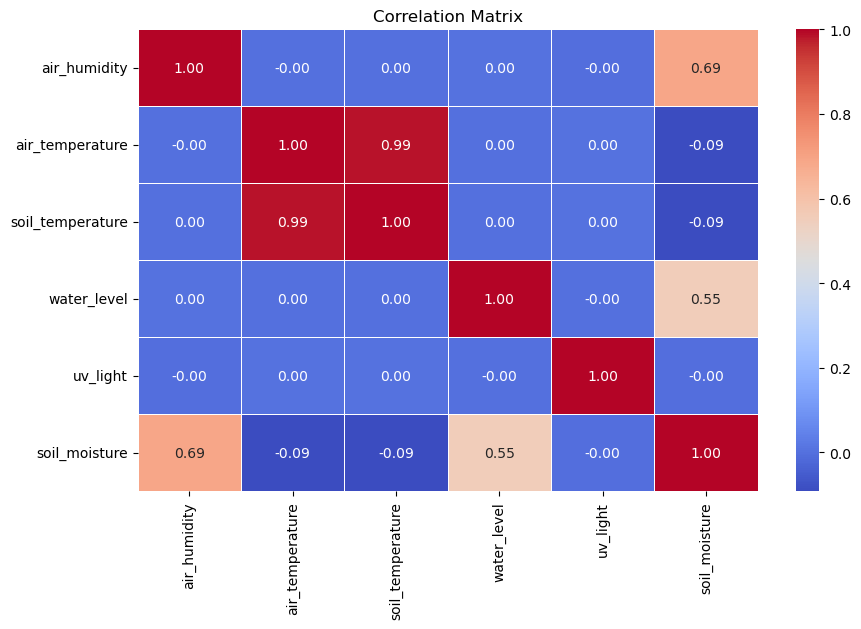

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

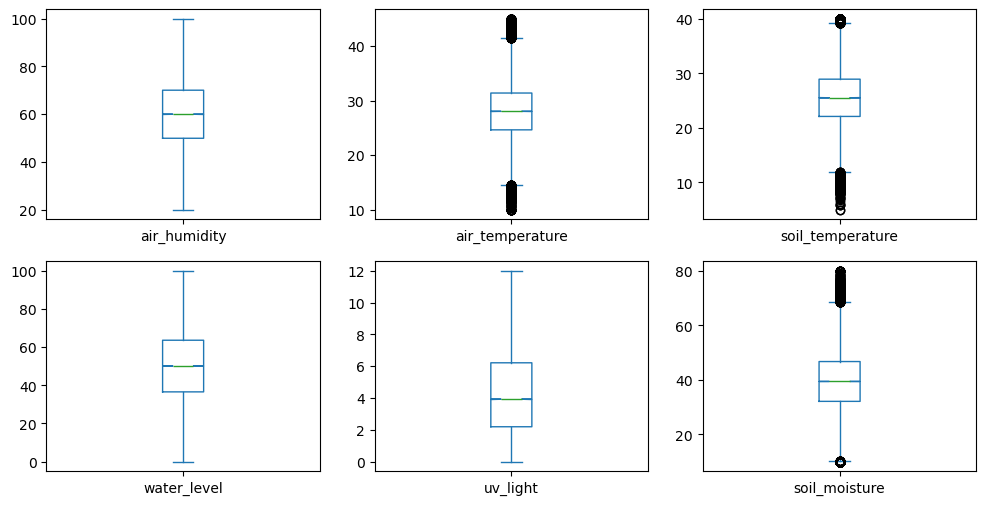

In [11]:
# Boxplots for outlier detection
num_cols = Data.select_dtypes(include=['int64', 'float64']).columns
Data[num_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6), notch=True)
plt.show()

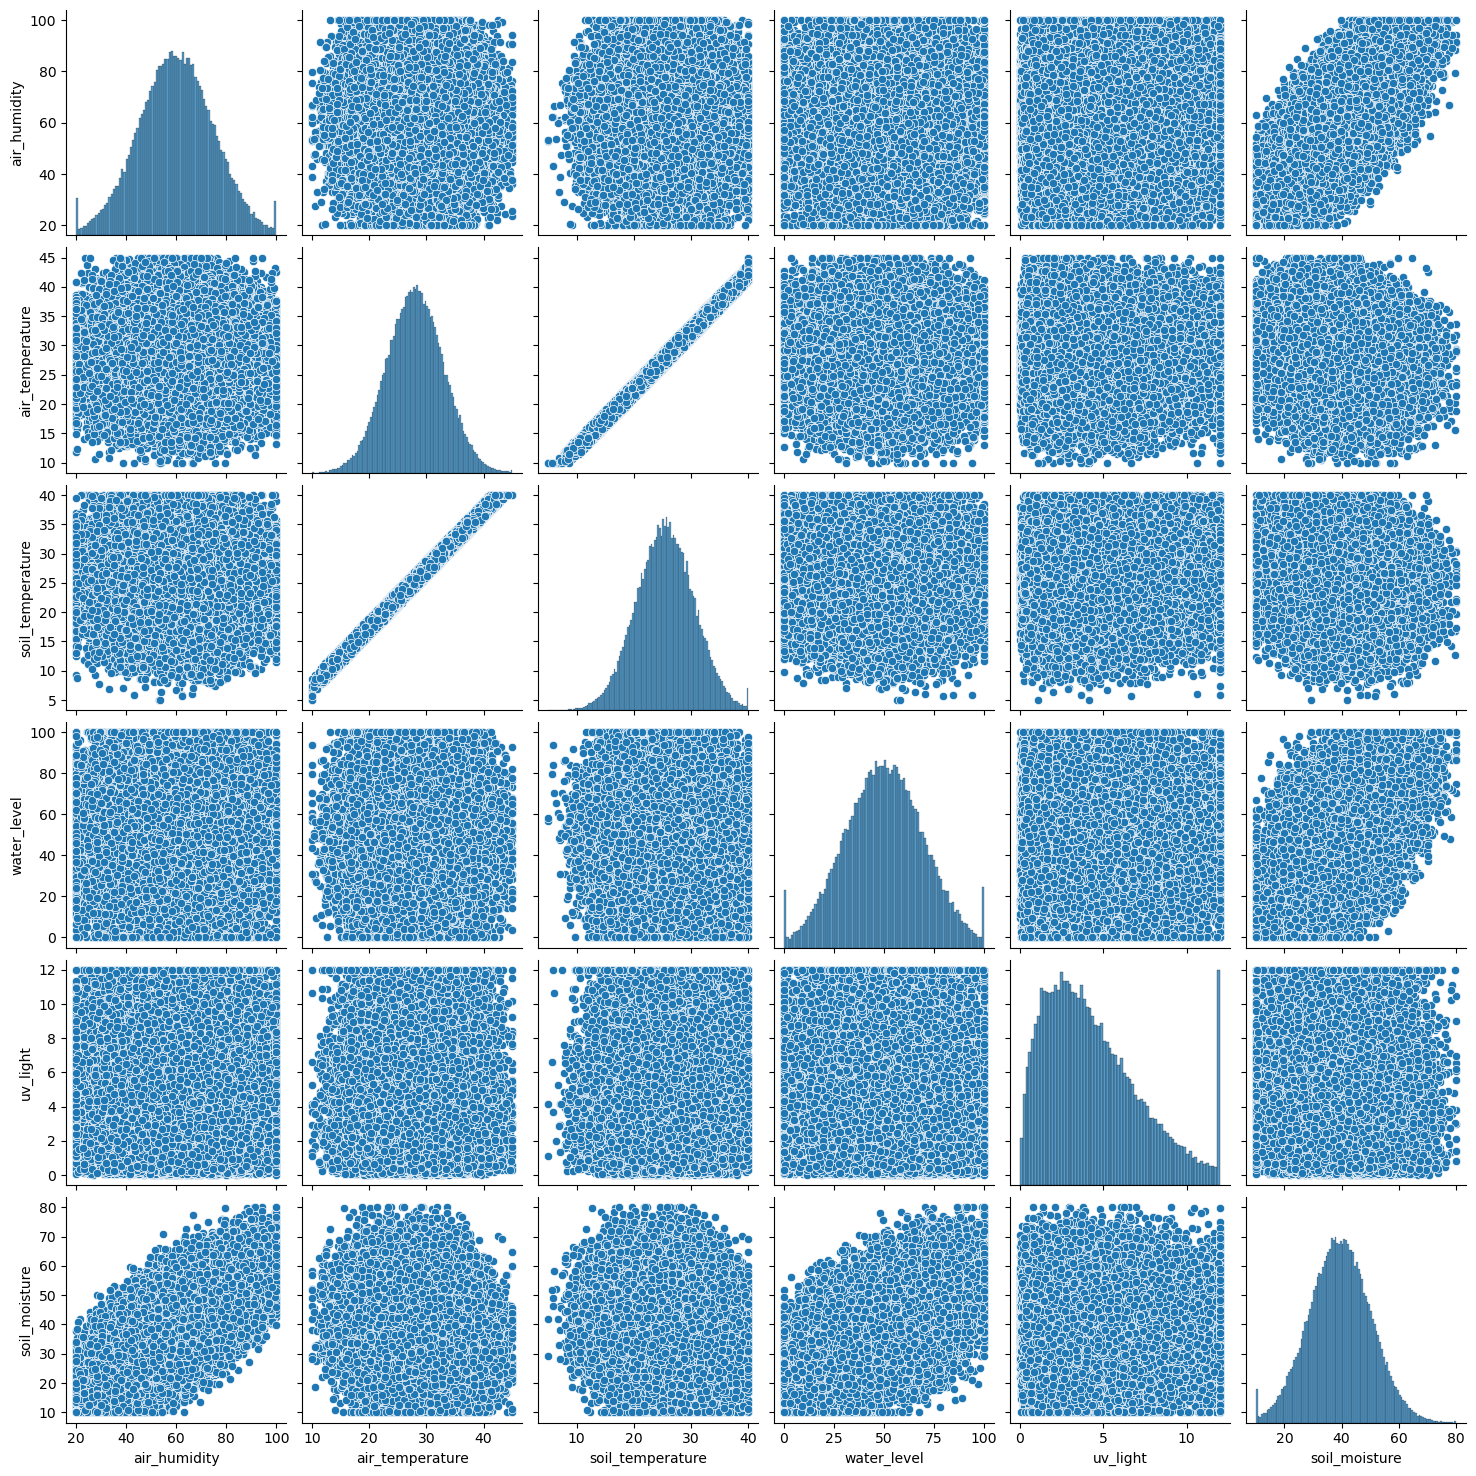

In [12]:
# Pairplot for relationships
sns.pairplot(Data)
plt.show()

Skewness of Soil Moisture: 0.03
No transformation needed.


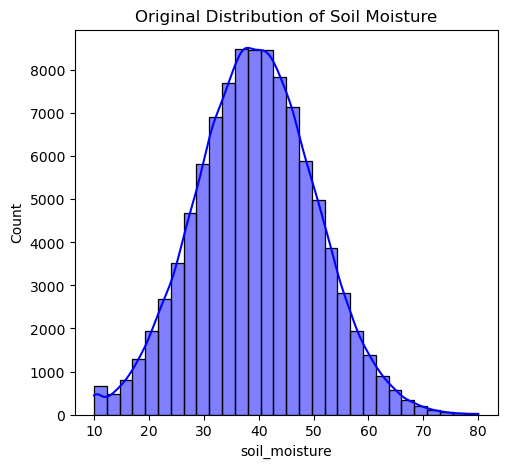

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Check distribution of Soil Moisture
plt.figure(figsize=(12, 5))

# Histogram before transformation
plt.subplot(1, 2, 1)
sns.histplot(Data["soil_moisture"], kde=True, bins=30, color='blue')
plt.title("Original Distribution of Soil Moisture")

# Check skewness
skewness = skew(Data["soil_moisture"])
print(f"Skewness of Soil Moisture: {skewness:.2f}")

# Apply log transformation if data is right-skewed
if skewness > 0.5:  # Skewness threshold for transformation
    Data["soil_moisture_Log"] = np.log1p(Data["soil_moisture"])  # log(1+x) to handle zero values

    # Histogram after transformation
    plt.subplot(1, 2, 2)
    sns.histplot(Data["soil_moisture_Log"], kde=True, bins=30, color='green')
    plt.title("Log-Transformed Soil Moisture")

    print("Log transformation applied.")
else:
    print("No transformation needed.")

plt.show()

In [14]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Data["soil_moisture"].quantile(0.25)
Q3 = Data["soil_moisture"].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
Data_cleaned = Data[(Data["soil_moisture"] >= lower_bound) & (Data["soil_moisture"] <= upper_bound)]

# Print the number of rows before and after outlier removal
print(f"Original dataset size: {Data.shape[0]} rows")
print(f"New dataset size after outlier removal: {Data_cleaned.shape[0]} rows")
print(f"Number of outliers removed: {Data.shape[0] - Data_cleaned.shape[0]} rows")

Original dataset size: 100000 rows
New dataset size after outlier removal: 99255 rows
Number of outliers removed: 745 rows


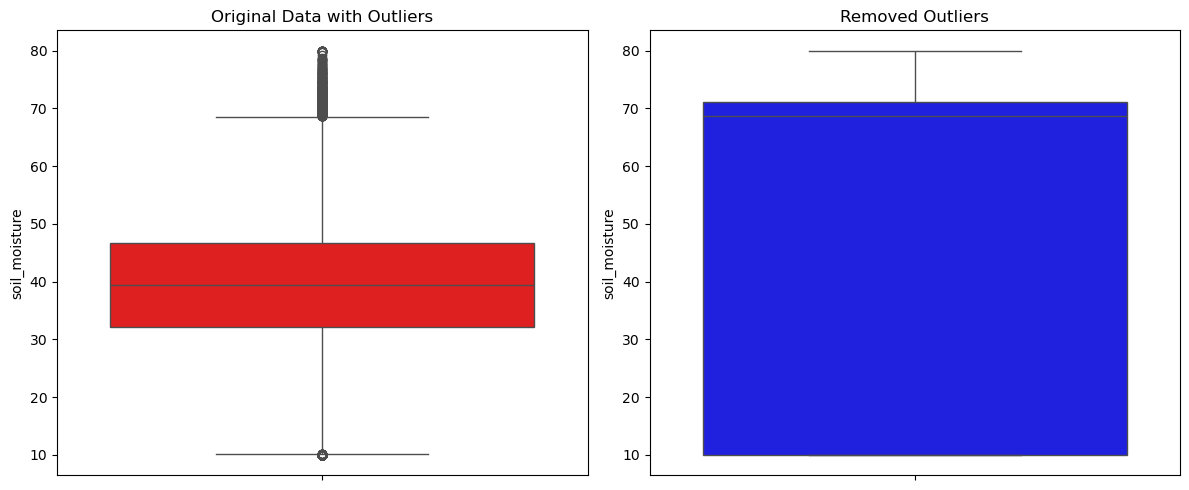

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify outliers
outliers = Data[(Data["soil_moisture"] < lower_bound) | (Data["soil_moisture"] > upper_bound)]

# Create side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data with outliers
sns.boxplot(y=Data["soil_moisture"], ax=axes[0], color="red")
axes[0].set_title("Original Data with Outliers")

# Outliers only
sns.boxplot(y=outliers["soil_moisture"], ax=axes[1], color="blue")
axes[1].set_title("Removed Outliers")

plt.tight_layout()
plt.show()

# Data Preprocessing

 Data Generation & Cleaning 

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select features for scaling (excluding target variable)
features = ['air_humidity', 'air_temperature', 'soil_temperature', 'water_level', 'uv_light']

# Apply Min-Max Scaling (0-1)
scaler = MinMaxScaler()
Data[features] = scaler.fit_transform(Data[features])

# Display processed dataset
print(Data.head())  # Show the first few rows of the dataset

   air_humidity  air_temperature  soil_temperature  water_level  uv_light  \
0      0.535375         0.287714          0.337714       0.7137  0.736667   
1      0.281250         0.381429          0.420571       0.3384  0.255000   
2      0.232375         0.295143          0.325429       0.2926  0.235000   
3      0.497250         0.548857          0.598571       0.4820  0.124167   
4      0.745875         0.184857          0.230286       0.3643  0.866667   

   soil_moisture  
0      51.429797  
1      25.552631  
2      24.505993  
3      29.023783  
4      44.319928  


# Data Visualization

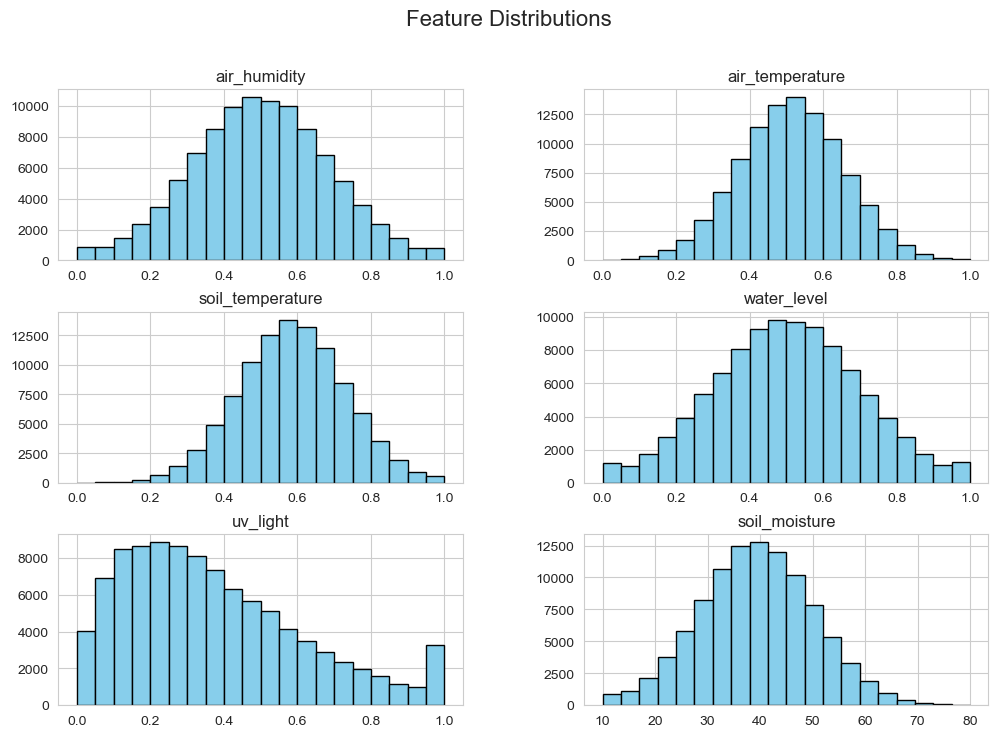

In [20]:
# Set style
sns.set_style("whitegrid")

# ==============================
# HISTOGRAMS: Feature Distributions
# ==============================
Data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

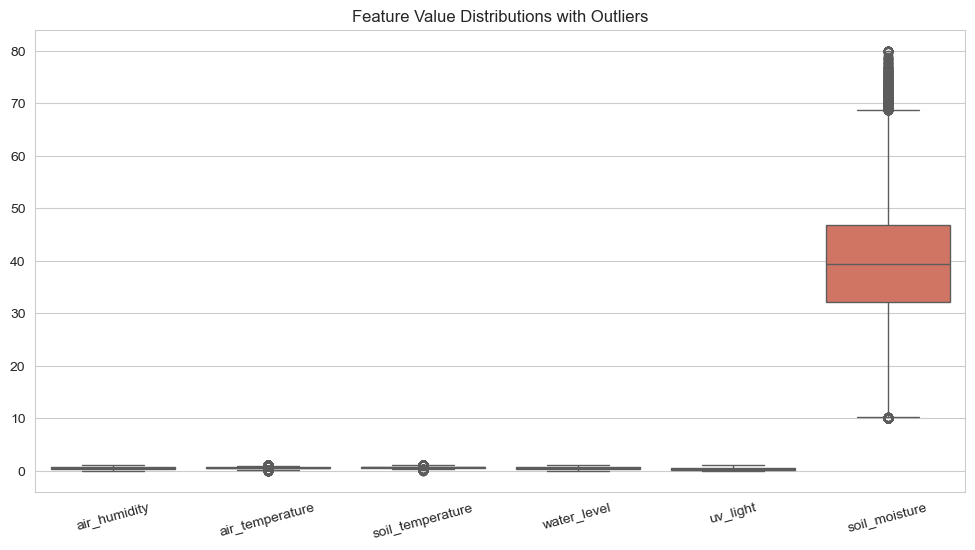

In [21]:
# ==============================
# BOXPLOTS: Checking for Outliers
# ==============================
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data, palette="coolwarm")
plt.xticks(rotation=15)
plt.title("Feature Value Distributions with Outliers")
plt.show()

# Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ==============================
# SPLIT DATA INTO TRAIN & TEST
# ==============================
X = Data.drop(columns=['soil_moisture'])  # Features
y = Data['soil_moisture']  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [25]:
# TRAINING LINEAR REGRESSION MODEL
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# PREDICTION & EVALUATION
# ==============================
y_pred = model.predict(X_test)

In [27]:
# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [28]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better


🔹 R² Score: 0.7867
🔹 MAE: 3.9511
🔹 MSE: 24.4814
🔹 RMSE: 4.9479


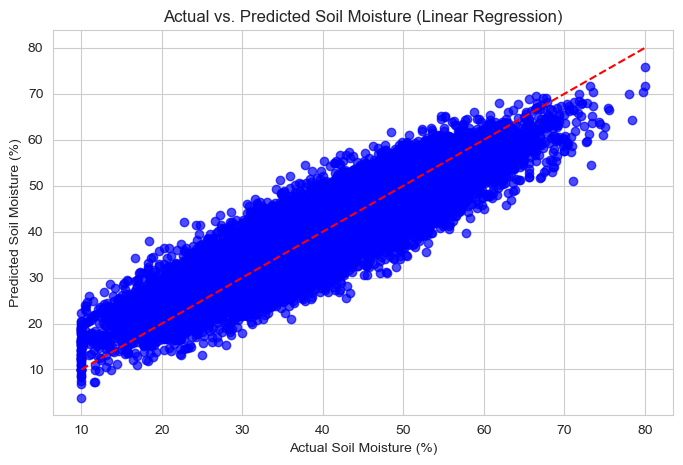

In [29]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (Linear Regression)")
plt.grid(True)
plt.show()

# Random Forest Regressor

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# TRAINING RANDOM FOREST MODEL
# ==============================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# PREDICTION & EVALUATION
# ==============================
y_pred = rf_model.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [34]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7690
🔹 MAE: 4.1181
🔹 MSE: 26.5055
🔹 RMSE: 5.1484


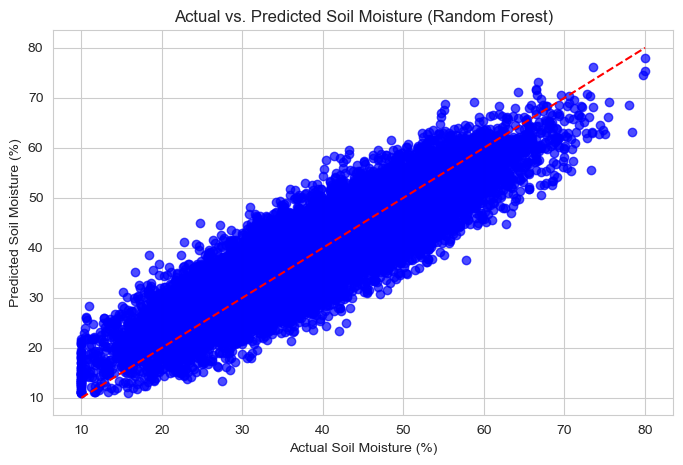

In [35]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (Random Forest)")
plt.grid(True)
plt.show()

# Support Vector Regressor

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
 #FEATURE SCALING (SVR requires scaling)
# ==============================
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [39]:
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.5, random_state=42
)

In [40]:
# TRAINING SVR MODEL
# ==============================
svr_model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.1)
svr_model.fit(X_train_sample, y_train_sample)

SVR(C=10, gamma=0.01)

In [41]:
# PREDICTION & EVALUATION
# ==============================
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [42]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7863
🔹 MAE: 3.9559
🔹 MSE: 24.5202
🔹 RMSE: 4.9518


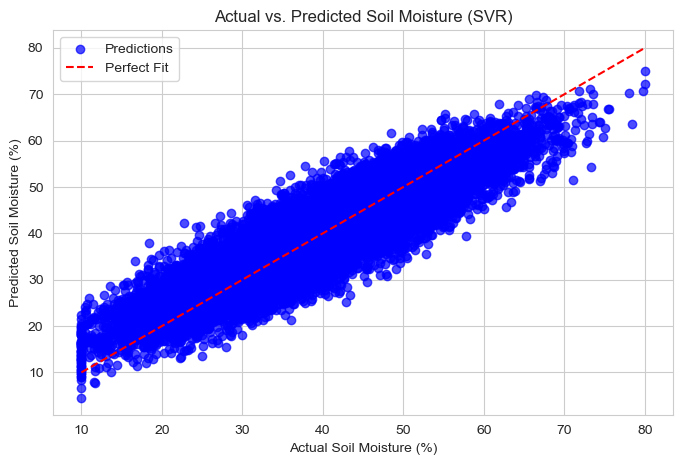

In [43]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (SVR)")
plt.legend()
plt.grid(True)
plt.show()

# Advanced ML Models

# XGBoost

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
# TRAINING XGBOOST REGRESSOR
# ==============================
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
# PREDICTION & EVALUATION
# ==============================
y_pred = xgb_model.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [49]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7845
🔹 MAE: 3.9765
🔹 MSE: 24.7335
🔹 RMSE: 4.9733


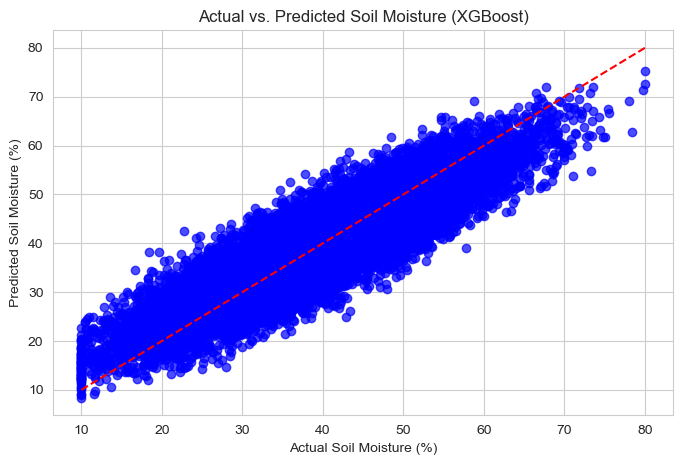

In [50]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (XGBoost)")
plt.grid(True)
plt.show()

# LightBGM(LGBM)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
# TRAINING LIGHTGBM REGRESSOR
# ==============================
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,  # No limit on depth
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5
[LightGBM] [Info] Start training from score 39.396984


LGBMRegressor(colsample_bytree=0.8, random_state=42, subsample=0.8)

In [54]:
# PREDICTION & EVALUATION
# ==============================
y_pred = lgb_model.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [55]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7858
🔹 MAE: 3.9620
🔹 MSE: 24.5799
🔹 RMSE: 4.9578


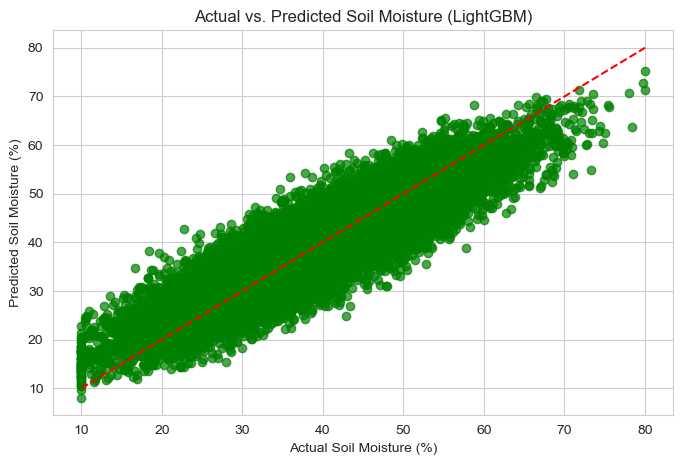

In [56]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (LightGBM)")
plt.grid(True)
plt.show()

# CatBoost

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
# TRAINING CATBOOST REGRESSOR
# ==============================
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=100,
    random_seed=42
)

cat_model.fit(X_train, y_train)

0:	learn: 10.1267060	total: 167ms	remaining: 1m 23s
100:	learn: 4.9759380	total: 767ms	remaining: 3.03s
200:	learn: 4.9471202	total: 1.63s	remaining: 2.43s
300:	learn: 4.9198113	total: 2.72s	remaining: 1.8s
400:	learn: 4.8948759	total: 3.92s	remaining: 967ms
499:	learn: 4.8717310	total: 5.26s	remaining: 0us


In [60]:
# PREDICTION & EVALUATION
# ==============================
y_pred = cat_model.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [61]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7856
🔹 MAE: 3.9635
🔹 MSE: 24.5990
🔹 RMSE: 4.9597


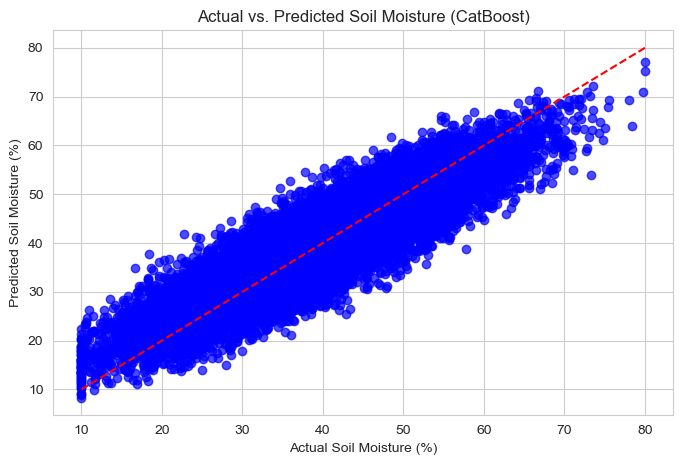

In [62]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (CatBoost)")
plt.grid(True)
plt.show()

# ANN

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='linear')  # Output Layer (Regression)
])

C:\Users\himan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [68]:
# TRAIN ANN MODEL
# ==============================
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                    epochs=100, batch_size=16, verbose=1)

Epoch 1/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 55.2998 - mae: 5.0686 - val_loss: 24.7289 - val_mae: 3.9749
Epoch 2/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 27.2345 - mae: 4.1704 - val_loss: 25.2590 - val_mae: 4.0094
Epoch 3/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 26.0859 - mae: 4.0856 - val_loss: 25.6860 - val_mae: 4.0558
Epoch 4/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 26.2148 - mae: 4.0916 - val_loss: 25.0071 - val_mae: 3.9959
Epoch 5/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 25.9143 - mae: 4.0709 - val_loss: 26.1353 - val_mae: 4.0893
Epoch 6/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 25.8984 - mae: 4.0702 - val_loss: 24.7232 - val_mae: 3.9715
Epoch 7/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 25.7649 - mae: 4.0609 - val_loss: 24.8637 - val_mae: 3.9802
Epoch 8/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 25.7054 - mae: 4.0502 - val_loss: 24.6301 - val_mae: 3.9598
Epoch 9/

In [69]:
# PREDICTION & EVALUATION
# ==============================
y_pred = model.predict(X_test_scaled).flatten()

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [70]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7838
🔹 MAE: 3.9837
🔹 MSE: 24.8153
🔹 RMSE: 4.9815


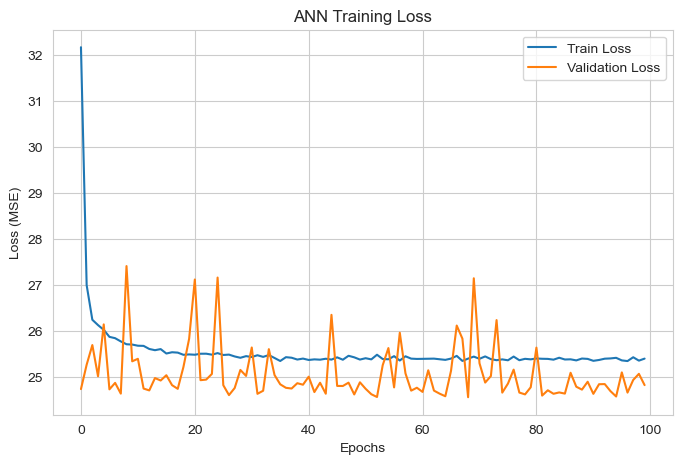

In [71]:
# VISUALIZE TRAINING LOSS
# ==============================
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("ANN Training Loss")
plt.legend()
plt.grid(True)
plt.show()

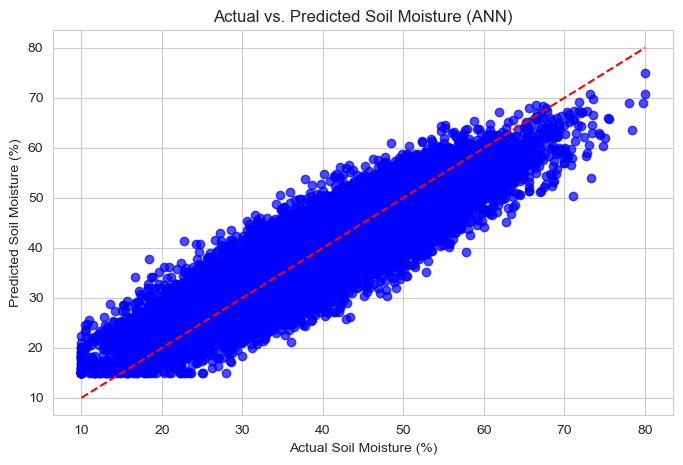

In [72]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (ANN)")
plt.grid(True)
plt.show()

# KNN

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
# TRAIN KNN REGRESSOR
# ==============================
k = 5  # Number of neighbors (can tune this)
knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [76]:
# PREDICTION & EVALUATION
# ==============================
y_pred = knn.predict(X_test_scaled)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [77]:
# DISPLAY RESULTS
# ==============================
print(f"🔹 R² Score: {r2:.4f}")   # Closer to 1 is better
print(f"🔹 MAE: {mae:.4f}")       # Lower is better
print(f"🔹 MSE: {mse:.4f}")       # Lower is better
print(f"🔹 RMSE: {rmse:.4f}")     # Lower is better

🔹 R² Score: 0.7394
🔹 MAE: 4.3731
🔹 MSE: 29.9030
🔹 RMSE: 5.4684


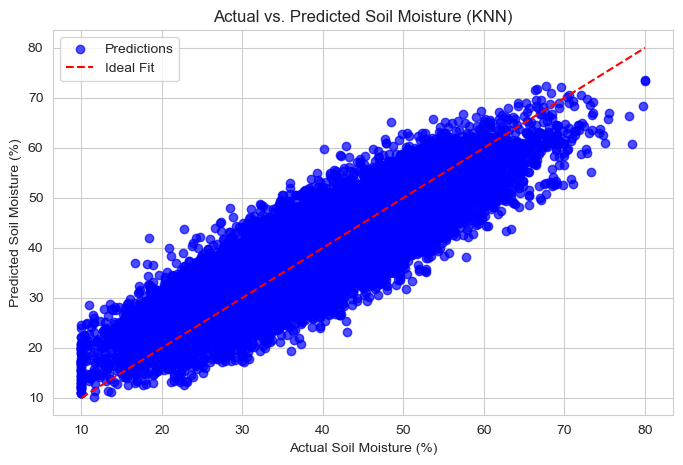

In [78]:
# VISUALIZE PREDICTIONS vs. ACTUAL
# ==============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Soil Moisture (%)")
plt.ylabel("Predicted Soil Moisture (%)")
plt.title("Actual vs. Predicted Soil Moisture (KNN)")
plt.legend()
plt.grid(True)
plt.show()

# Model Comparision

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# -------------------------
# 📌 1️⃣ Define Models (Including ANN)
# -------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results[name] = [r2, mae, mse, rmse]

# -------------------------
# 📌 2️⃣ Add Artificial Neural Network (ANN)
# -------------------------
print("Training ANN...")

# Define ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile ANN model
ann.compile(optimizer='adam', loss='mse')

# Train ANN
ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predictions
y_pred_ann = ann.predict(X_test).flatten()

# Evaluate ANN
r2_ann = r2_score(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)

# Store ANN results
results["ANN"] = [r2_ann, mae_ann, mse_ann, rmse_ann]

# -------------------------
# 📌 3️⃣ Results Summary
# -------------------------

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["R² Score", "MAE", "MSE", "RMSE"]).T

print("\n📊 Model Performance Comparison:\n")
print(results_df)


Training Linear Regression...
Training Random Forest...
Training SVR...
Training KNN...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5
[LightGBM] [Info] Start training from score 39.396984
Training CatBoost...
Training ANN...


C:\Users\himan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Model Performance Comparison:

                   R² Score       MAE        MSE      RMSE
Linear Regression  0.786666  3.951054  24.481388  4.947867
Random Forest      0.769027  4.118123  26.505512  5.148350
SVR                0.784878  3.968569  24.686571  4.968558
KNN                0.741986  4.354230  29.608638  5.441382
XGBoost            0.779974  4.013618  25.249291  5.024867
LightGBM           0.785364  3.967615  24.630850  4.962948
CatBoost           0.784939  3.973026  24.679596  4.967856
ANN                0.786133  3.956597  24.542509  4.954040


# Hyperparameter Tuning

# Random Forest

1. PSO

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pyswarm import pso
from sklearn.model_selection import train_test_split

# Define the objective function
def objective_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    min_samples_leaf = int(params[3])

    # Ensure valid hyperparameter values
    n_estimators = max(10, n_estimators)
    max_depth = max(3, max_depth)
    min_samples_split = max(2, min_samples_split)
    min_samples_leaf = max(1, min_samples_leaf)

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                  random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the search space (lower and upper bounds)
lb = [10, 3, 2, 1]   # Lower bounds: n_estimators, max_depth, min_samples_split, min_samples_leaf
ub = [200, 20, 10, 10]  # Upper bounds

# Run PSO optimization
best_params, best_mse = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract the best parameters
best_n_estimators = int(best_params[0])
best_max_depth = int(best_params[1])
best_min_samples_split = int(best_params[2])
best_min_samples_leaf = int(best_params[3])

print(f"Best Parameters for Random Forest using PSO:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_depth: {best_max_depth}")
print(f"min_samples_split: {best_min_samples_split}")
print(f"min_samples_leaf: {best_min_samples_leaf}")
print(f"Best MSE: {best_mse}")

# Train Random Forest with optimized parameters
optimized_rf = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                     min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                     random_state=42, n_jobs=-1)
optimized_rf.fit(X_train, y_train)
y_pred_optimized = optimized_rf.predict(X_test)

# Final MSE after PSO tuning
final_mse = mean_squared_error(y_test, y_pred_optimized)
final_rmse = np.sqrt(final_mse)  # Root Mean Squared Error
final_mae = mean_absolute_error(y_test, y_pred_optimized)  # Mean Absolute Error
final_r2 = r2_score(y_test, y_pred_optimized)  # R² Score

# Print all evaluation metrics
print(f"📊 Model Evaluation Metrics after PSO Optimization:")
print(f"🔹 R² Score: {final_r2:.4f}")
print(f"🔹 MAE (Mean Absolute Error): {final_mae:.4f}")
print(f"🔹 MSE (Mean Squared Error): {final_mse:.4f}")
print(f"🔹 RMSE (Root Mean Squared Error): {final_rmse:.4f}")

2. Optuna

import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define Objective Function for Optuna
def objective(trial):
    # Define Search Space for Hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Initialize and Train Random Forest
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                               random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predict and Evaluate using MSE
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse  # Optuna minimizes MSE

# Run Optuna Optimization
study = optuna.create_study(direction='minimize')  # Minimize MSE
study.optimize(objective, n_trials=50)  # Perform 50 optimization trials

# Get Best Hyperparameters
best_params = study.best_params
print(f"Best Parameters from Optuna: {best_params}")

# Train Final Model with Optimized Parameters
optimized_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
optimized_rf.fit(X_train, y_train)

# Make Predictions
y_pred_optimized = optimized_rf.predict(X_test)

# Compute Evaluation Metrics
final_mse = mean_squared_error(y_test, y_pred_optimized)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred_optimized)
final_r2 = r2_score(y_test, y_pred_optimized)

# Print Results
print("\n Model Evaluation Metrics after Optuna Optimization:")
print(f"🔹 R² Score: {final_r2:.4f}")
print(f"🔹 MAE: {final_mae:.4f}")
print(f"🔹 MSE: {final_mse:.4f}")
print(f"🔹 RMSE: {final_rmse:.4f}")


3. AOC

import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the search space for hyperparameters
param_space = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Define the objective function (MSE)
def objective_function(params):
    rf = RandomForestRegressor(n_estimators=params[0], 
                               max_depth=params[1], 
                               min_samples_split=params[2], 
                               min_samples_leaf=params[3], 
                               random_state=42, n_jobs=-1)
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# ACO Parameters
num_ants = 10  
num_iterations = 20  
evaporation_rate = 0.5  
alpha = 1  
beta = 2  

# Initialize pheromone levels
pheromones = {key: np.ones(len(values)) for key, values in param_space.items()}

# Run ACO
best_params = None
best_mse = float("inf")

for iteration in range(num_iterations):
    solutions = []

    for ant in range(num_ants):
        # Construct a solution (randomly select hyperparameters based on pheromones)
        chosen_params = {key: np.random.choice(values, p=pheromones[key] / sum(pheromones[key])) 
                         for key, values in param_space.items()}
        
        param_values = [chosen_params['n_estimators'], 
                        chosen_params['max_depth'], 
                        chosen_params['min_samples_split'], 
                        chosen_params['min_samples_leaf']]
        
        mse = objective_function(param_values)
        solutions.append((chosen_params, mse))
        
        # Update best solution
        if mse < best_mse:
            best_mse = mse
            best_params = chosen_params

    # Update pheromone levels
    for key in param_space.keys():
        pheromones[key] *= (1 - evaporation_rate)  # Evaporation
        for params, mse in solutions:
            pheromones[key][param_space[key].index(params[key])] += 1 / mse  # Reinforcement

# Train Random Forest with optimized parameters
optimized_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
optimized_rf.fit(X_train, y_train)
y_pred_optimized = optimized_rf.predict(X_test)

# Compute Evaluation Metrics
final_mse = mean_squared_error(y_test, y_pred_optimized)
final_rmse = np.sqrt(final_mse)
final_r2 = optimized_rf.score(X_test, y_test)

# Print Results
print("\nModel Evaluation Metrics after ACO Optimization:")
print(f"Best Parameters: {best_params}")
print(f"R² Score: {final_r2:.4f}")
print(f"MSE: {final_mse:.4f}")
print(f"RMSE: {final_rmse:.4f}")

# Compare Hyperparameter Tuning Techniques for Random Forest

import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# For Optuna and PSO
import optuna
from pyswarm import pso

# -------------------------
# 📌 1️⃣ Load Dataset (Replace with your dataset)
# -------------------------
# X, y = load_your_data()  

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 📌 2️⃣ Default Random Forest (Before Tuning)
# -------------------------
rf_default = RandomForestRegressor(random_state=42, n_jobs=-1)
start_time = time.time()
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_time = time.time() - start_time

# Evaluation Function
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return {
        "R² Score": r2_score(y_test, y_pred),
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "MAE": mean_absolute_error(y_test, y_pred),
    }

results = {
    "Default RF": evaluate_model(y_test, y_pred_default),
}

# -------------------------
# 📌 3️⃣ Hyperparameter Tuning
# -------------------------

# 🔹 Particle Swarm Optimization (PSO)
def rf_pso(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = map(int, params)
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth if max_depth > 0 else None,
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42, 
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)  # PSO minimizes this

lb = [50, 5, 2, 1]  # Lower bounds
ub = [200, 50, 20, 10]  # Upper bounds

start_time = time.time()
best_pso_params, _ = pso(rf_pso, lb, ub, swarmsize=10, maxiter=5)
pso_time = time.time() - start_time

best_pso_model = RandomForestRegressor(
    n_estimators=int(best_pso_params[0]), 
    max_depth=int(best_pso_params[1]),
    min_samples_split=int(best_pso_params[2]), 
    min_samples_leaf=int(best_pso_params[3]),
    random_state=42, 
    n_jobs=-1
)
best_pso_model.fit(X_train, y_train)
y_pred_pso = best_pso_model.predict(X_test)
results["PSO RF"] = evaluate_model(y_test, y_pred_pso)

# 🔹 Optuna Optimization
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42, 
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

start_time = time.time()
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
best_optuna_params = study.best_params
optuna_time = time.time() - start_time

best_optuna_model = RandomForestRegressor(**best_optuna_params, random_state=42, n_jobs=-1)
best_optuna_model.fit(X_train, y_train)
y_pred_optuna = best_optuna_model.predict(X_test)
results["Optuna RF"] = evaluate_model(y_test, y_pred_optuna)

# -------------------------
# 📌 4️⃣ Results Summary
# -------------------------

df_results = pd.DataFrame(results).T
df_results["Training Time (s)"] = [default_time, pso_time, optuna_time]  

print("\n📊 Model Performance Comparison:\n")
print(df_results)


# Output Prediction

In [184]:
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Force output between 0 and 1
])

C:\Users\himan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [186]:
scaled_prediction = ann.predict(user_input_scaled).flatten()[0]
predicted_moisture = 10 + scaled_prediction * (80 - 10)  # scale to [10,80]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [188]:
user_input_df = pd.DataFrame(user_input, columns=X.columns)  # X is your training DataFrame
user_input_scaled = scaler.transform(user_input_df)

In [192]:
# 📌 Take User Input
air_humidity = float(input("Enter Air Humidity: "))
air_temp = float(input("Enter Air Temperature: "))
soil_temp = float(input("Enter Soil Temperature: "))
water_level = float(input("Enter Water Level: "))
uv_light = float(input("Enter UV Light: "))

# 📌 Prepare DataFrame
user_input = [[air_humidity, air_temp, soil_temp, water_level, uv_light]]
user_input_df = pd.DataFrame(user_input, columns=X.columns)

# 📌 Scale Input
user_input_scaled = scaler.transform(user_input_df)

# 📌 Predict & Scale Output to [10, 80]
scaled_output = ann.predict(user_input_scaled).flatten()[0]
predicted_moisture = 10 + scaled_output * (80 - 10)

# 📊 Display Result
print("\n📊 Prediction Result:\n")
print("-" * 81)
print(f"{'air_humidity':<15}{'air_temperature':<18}{'soil_temperature':<18}"
      f"{'water_level':<15}{'uv_light':<12}{'soil_moisture':<15}")
print("-" * 81)
print(f"{air_humidity:<15.2f}{air_temp:<18.2f}{soil_temp:<18.2f}"
      f"{water_level:<15.2f}{uv_light:<12.2f}{predicted_moisture:<15.4f}")
print("\n🔻 Minimum Moisture in Prediction     : 10.0")
print("🔺 Maximum Moisture in Prediction     : 80.0")

Enter Air Humidity:  63
Enter Air Temperature:  25
Enter Soil Temperature:  26
Enter Water Level:  32
Enter UV Light:  3.4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

📊 Prediction Result:

---------------------------------------------------------------------------------
air_humidity   air_temperature   soil_temperature  water_level    uv_light    soil_moisture  
---------------------------------------------------------------------------------
63.00          25.00             26.00             32.00          3.40        80.0000        

🔻 Minimum Moisture in Prediction     : 10.0
🔺 Maximum Moisture in Prediction     : 80.0


In [198]:
# ✅ Get actual min and max from training data
min_moisture = y_train.min()
max_moisture = y_train.max()

# 📌 Take User Input
air_humidity = float(input("Enter Air Humidity: "))
air_temp = float(input("Enter Air Temperature: "))
soil_temp = float(input("Enter Soil Temperature: "))
water_level = float(input("Enter Water Level: "))
uv_light = float(input("Enter UV Light: "))

# 📌 Prepare DataFrame
user_input = [[air_humidity, air_temp, soil_temp, water_level, uv_light]]
user_input_df = pd.DataFrame(user_input, columns=X.columns)

# 📌 Scale Input
user_input_scaled = scaler.transform(user_input_df)

# 📌 Predict & Rescale Output based on dataset's actual min/max
scaled_output = ann.predict(user_input_scaled).flatten()[0]
predicted_moisture = min_moisture + scaled_output * (max_moisture - min_moisture)

# 📊 Display Result
print("\n📊 Prediction Result (in tabular format):\n")
print("-" * 81)
print(f"{'air_humidity':<15}{'air_temperature':<18}{'soil_temperature':<18}"
      f"{'water_level':<15}{'uv_light':<12}{'soil_moisture':<15}")
print("-" * 81)
print(f"{air_humidity:<15.2f}{air_temp:<18.2f}{soil_temp:<18.2f}"
      f"{water_level:<15.2f}{uv_light:<12.2f}{predicted_moisture:<15.4f}")

print(f"\n🔻 Minimum Moisture in Training Data  : {min_moisture:.2f}")
print(f"🔺 Maximum Moisture in Training Data  : {max_moisture:.2f}")

Enter Air Humidity:  21
Enter Air Temperature:  45
Enter Soil Temperature:  46
Enter Water Level:  98
Enter UV Light:  8.4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

📊 Prediction Result (in tabular format):

---------------------------------------------------------------------------------
air_humidity   air_temperature   soil_temperature  water_level    uv_light    soil_moisture  
---------------------------------------------------------------------------------
21.00          45.00             46.00             98.00          8.40        10.0000        

🔻 Minimum Moisture in Training Data  : 10.00
🔺 Maximum Moisture in Training Data  : 80.00


In [200]:
import joblib

# Save ANN Model
ann.save("ann_model.h5")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']